# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
train = pd.read_csv('/content/gdrive/MyDrive/train_test_data/train_data.csv')
test = pd.read_csv('/content/gdrive/MyDrive/train_test_data/test.csv')

In [ ]:
train.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


In [ ]:
#reorder the dataset and assign it to a new dataframe for machine learning.
#we wanna rearange the column
df_train = train[['latitude','longitude','year','label']]

In [ ]:
df_train.head()

,latitude,longitude,year,label
0,-2.051853,111.826093,2001,0
1,-1.989349,105.309496,2013,2
2,1.223256,100.702217,2014,0
3,-2.342948,103.890226,2008,0
4,-0.126555,101.758175,2011,0


In [ ]:
#we have got no missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   8 non-null      float64
 1   longitude  8 non-null      float64
 2   year       8 non-null      int64  
 3   label      8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 384.0 bytes


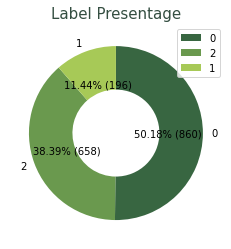

In [ ]:
# define a function to calculate the pct for pie plot.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct
data = df_train.label.value_counts()


colors = ['#386641', '#6a994e', '#a7c957']

plt.pie(data, labels = data.index,startangle = 90, colors = colors,counterclock = False, wedgeprops = {'width' : 0.5},autopct=make_autopct(train.label.value_counts()))

# change the color of the label.
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Label Presentage',color='#344e41',fontsize=15)
plt.show()
 

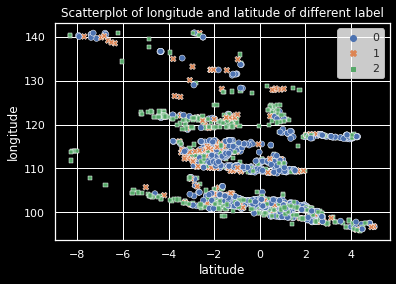

In [7]:
import seaborn as sns
# set the background of the scatter plot to be black.
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# create the scatter plot
sns.scatterplot(data=train,x='latitude',y='longitude',hue='label',style='label',palette='deep')
plt.title('Scatterplot of longitude and latitude of different label',color='white')

# change the color of the legend, xlabel, y label and ticks.
plt.legend()
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
plt.tick_params(colors='white')
plt.xlabel('latitude',color='white')
plt.ylabel('longitude',color='white')
plt.show()

In [12]:
# Based on the label of the data, group them into different dataset
train_0 = train[train.label==0]
train_1 = train[train.label==1]
train_2 = train[train.label==2]

In [19]:
# define a file path for the image.
file_path = '/content/gdrive/MyDrive/My_Data/'

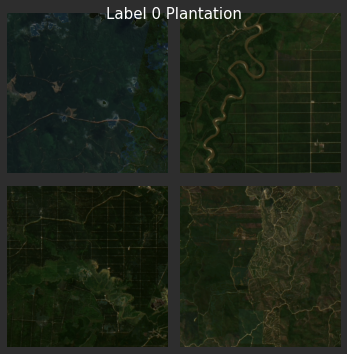

In [20]:
#create 2x2 grid of images
fig, ax = plt.subplots(2, 2, figsize=(5, 5),tight_layout=True,sharex=True,sharey=True)

#set main title
fig.suptitle('Label 0 Plantation', 
fontsize=15,
color='white')

#change background color to a dark grey
fig.patch.set_facecolor('#2d2d2d')
#load the picture with label 0 from the file.
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(plt.imread(file_path+train_0['example_path'].iloc[i*2+j]))
        ax[i,j].axis('off')

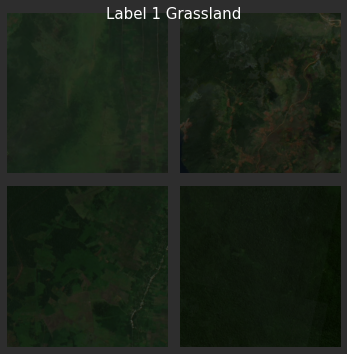

In [21]:
#create 2x2 grid of images
fig, ax = plt.subplots(2, 2, figsize=(5, 5),tight_layout=True,sharex=True,sharey=True)

#set main title
fig.suptitle('Label 1 Grassland', 
fontsize=15,
color='white')

#change background color to a dark grey
fig.patch.set_facecolor('#2d2d2d')
#load the picture with label 0 from the file.
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(plt.imread(file_path+train_1['example_path'].iloc[i*2+j]))
        ax[i,j].axis('off')

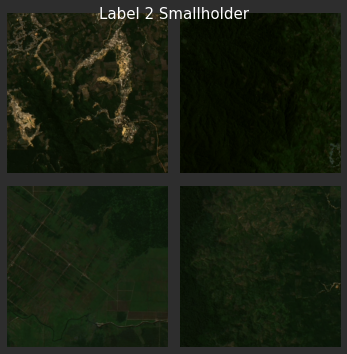

In [22]:
#create 2x2 grid of images
fig, ax = plt.subplots(2, 2, figsize=(5, 5),tight_layout=True,sharex=True,sharey=True)

#set main title
fig.suptitle('Label 2 Smallholder', 
fontsize=15,
color='white')

#change background color to a dark grey
fig.patch.set_facecolor('#2d2d2d')
#load the picture with label 0 from the file.
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(plt.imread(file_path+train_2['example_path'].iloc[i*2+j]))
        ax[i,j].axis('off')

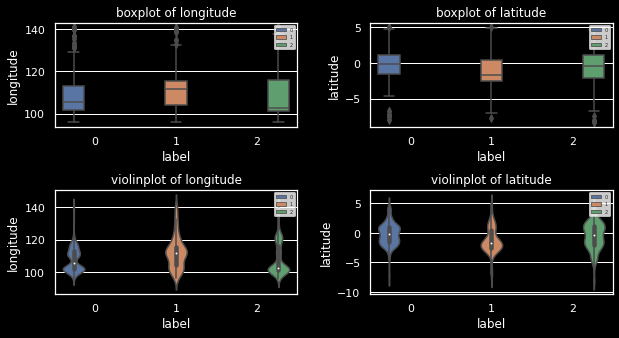

In [8]:
# create the subplot and configure is setting.
fig, ax = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.3,hspace=0.6)

# setting the background color of the subplots.
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# create the box plot and violin plot for longitude and latitude.
sns.boxplot(data=train,x='label',y='longitude',hue='label',ax=ax[0,0])
sns.boxplot(data=train,x='label',y='latitude',hue='label',ax=ax[0,1])
sns.violinplot(data=train,x='label',y='longitude',hue='label',ax=ax[1,0])
sns.violinplot(data=train,x='label',y='latitude',hue='label',ax=ax[1,1])

# create 2 list containing the info needed for the loop.
temp_list = ['longitude','latitude']
temp_list2 = ['boxplot','violinplot']

# loop for improve the plot.
for i in range(2):
    for j in range(2):
        # set the title of each subplots.
        ax[i,j].set_title(f'{temp_list2[i]} of {temp_list[j]}',color='white')
        # change the background color of the legend.
        legend = ax[i,j].legend(loc='upper right',prop={'size': 5})
        frame = legend.get_frame()
        frame.set_facecolor('white')
        # change the color of the axis and the label.
        ax[i,j].tick_params(colors='white')
        ax[i,j].set_xlabel('label',color='white')
        ax[i,j].set_ylabel(temp_list[j],color='white')
plt.show()

In [ ]:
!pip install geopandas

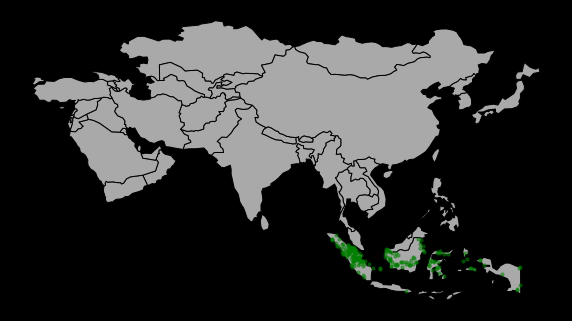

In [11]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


#location of some of the images
geometry = [Point(xy) for xy in zip(train['longitude'][0:200],
            train['latitude'][0:200])]

#convert to geodataframe
gdf = GeoDataFrame(train[0:200], geometry=geometry)   

#plot on map of Asia, for example
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'Asia'].plot(
    color='darkgray', edgecolor='black',figsize=(10,10))
ax.axis('off')

gdf.plot(ax=ax, color='green',alpha=0.5,markersize=10,
        marker='o',edgecolor='green')

# Build ML model

In [ ]:
#data is imbalanced
df_train.label.value_counts()

0    860
2    658
1    196
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(df_train.drop(columns='label'),
                                                 df_train['label'],
                                                 train_size=0.7,
                                                 random_state=42,shuffle=True)

In [ ]:
x_test

,latitude,longitude,year
1596,0.215771,102.669247,2014
1260,-3.730281,126.488725,2016
486,-4.670968,103.722537,2004
1137,-2.645764,140.304585,2013
367,-1.210368,131.238396,2014
...,...,...,...
692,0.414501,109.019453,2014
575,-6.646273,139.118861,2012
832,-1.963126,111.836550,2004
602,1.200706,121.209502,2015


In [ ]:
import imblearn

# create an object of SMOTE
oversample = imblearn.over_sampling.SMOTE()
# resample the train dataset.
x_train,y_train = oversample.fit_resample(x_train,y_train)
y_train.value_counts()

2    593
0    593
1    593
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
# create an object of standard scaler.
norm = StandardScaler()
# fit the standard sclaer by using the train dataset.
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

In [ ]:
%load_ext tensorboard

# 1) Imports and mappings

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import imgaug as ia
import imgaug.augmenters as iaa

from sklearn.utils import class_weight
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from itertools import cycle
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from scipy import interp
from json import dump

In [ ]:
mapping={
  'plantation': 0,
  'grassland': 1,
  'smallholder_agriculture': 2
}

reverse_mapping={
  0: 'plantation',
  1: 'grassland',
  2: 'smallholder_agriculture'
}

def label_mapping(label):
  if label == [1,0,0]: return 0
  if label == [0,1,0]: return 1
  if label == [0,0,1]: return 2

# Input Pipeline Class

In [ ]:
def process_image_file(filepath, size):
    """
      Loads an image given a file path and resizes it.
      Input: 
        - filepath: A string with the locaiton of the image.
        - size: A 2-tuple corresponding to the height and width of the image (height, width)
      Output:
        - img: The data matrix of the image
    """
    img = cv2.imread(filepath)
    img = cv2.resize(img, (size, size))
    return img


class BalanceDatasetGenerator(Sequence):
    """
        Creates an image generator using Keras Sequence object,
        and optionally enforces batch balancing.
    """

    def __init__(
            self,
            dataset,
            mapping,
            is_training=True,
            batch_size=8,
            input_shape=(224, 224),
            n_classes=3,
            num_channels=3,
            shuffle=True,
            augmentation=None,
            minority_percent=0.3,
            balancing=False,
    ):
        """
            Object Initialization.
            Input:
            example[0]: label, example[1]: lat, example[2]: lon, example[3]: year, example[4]: path
                - dataset: A list with the training instances, with the following structure.
                    - dataset[i][0]: Corresponds to the label
                    - dataset[i][1]: the latitude of the example,
                    - dataset[i][2]: the longitude of the object,
                    - dateset[i][3]: the year of the picture,
                    - dataset[i][4]: the path of the image
                - is_training: A boolean indicating training or test mode. If test, then balancing and augmentation are disabled.
                - batch_size: How many examples to load on a single call.
                - input_shape: The shape of the image (height, width)
                - n_classes: The number of classes in the training dataset
                - num_channels: The number of channels in each image.
                - shuffle: A boolean to indicate whether to shuffle the data on each epoch or not.
                - augmentation: A boolean to indicate whether to artifitially augment images.
                - minority_percent: What ratio to enforce on the minority class in each batch.
                - balancing: If True, batches will be balanced.
            Output:
                - A BalanceDatasetGenerator object

        """
        self.dataset = dataset
        self.is_training = is_training
        self.batch_size = batch_size
        self.N = len(self.dataset)
        self.input_shape = input_shape
        self.n_classes = n_classes
        self.num_channels = num_channels
        self.shuffle = True
        self.minority_percent = minority_percent
        self.n = 0
        self.augmentation = augmentation
        self.balancing = balancing

        # we define lists for each class. Inside goes file names.
        #{0: [], 1: [], 2: []}
        #label 2,0 in the same array while label 1 in onather array -->balancing
        datasets = {
            mapping["plantation"]: [], 
            mapping["grassland"]: [], 
            mapping["smallholder_agriculture"]: []}

        # example is a single training example from self.dataset where:
        # example[0]: label, example[1]: lat, example[2]: lon, example[3]: year, example[4]: path
        #filling it
        for example in self.dataset:
          datasets[example[0]].append(example)

        # if we want to balance batches we separate grassland examples 
        if self.balancing and self.is_training:
          self.datasets = [
              datasets[mapping["plantation"]] + 
              datasets[mapping["smallholder_agriculture"]],
              datasets[mapping["grassland"]]
          ]

        # otherwise, we put all three clases on a single list
        else:
          self.datasets = [
              datasets[mapping["plantation"]] + 
              datasets[mapping["smallholder_agriculture"]] + 
              datasets[mapping["grassland"]]
          ]
          #print(len(self.datasets[0]), len(self.datasets[1]))

        self.on_epoch_end()

    def __next__(self):
        """
        Get a new batch of data.
        Input:
            - None.
        Output:
            - batch_x: A batch of images.
            - batch_y: A batch of labels.
        """
        # Get one batch of data
        batch_x, batch_y = self.__getitem__(self.n)
        # Batch index
        self.n += 1

        # If we have processed the entire dataset then restart the index n
        if self.n >= self.__len__():
            self.on_epoch_end
            self.n = 0

        # return a batch of (images, labels)
        return batch_x, batch_y

    def __len__(self):
        return int(np.ceil(len(self.datasets[0]) / float(self.batch_size)))

    def on_epoch_end(self):
        """
            Defines what steps to take to prepare for a new trianing epoch.
            Input:
                - None
            Output:
                - None
        """
        if self.shuffle == True:
            for v in self.datasets:
                np.random.shuffle(v)

    def __getitem__(self, idx):
        """
            Load and preprocesses images to generate a single training batch.
            Input:
                - idx: The index of the training batch.
            Output:
                - batch_x: A batch of images.
                - batch_y: A batch of labels in one-hot encoding format.
        """

        # Defines the an empty container for the image batch before loading images
        batch_x = np.zeros((self.batch_size, *self.input_shape, self.num_channels), dtype="uint8")

        # Defines an empty container for the label batch before loading images
        batch_y = np.zeros(self.batch_size)


        # First, define the batch indices for the majority classes and get the filenames
        batch_indices = self.datasets[0][idx * self.batch_size:(idx + 1)*self.batch_size]

        if self.balancing:
          # Get the number of examples for a single batch by enforcing the equiprobability for all classes
          minority_size = max(int(len(batch_indices) * self.minority_percent), 1)

          # Get the indices that will use the minority sample to place its images and labels
          minority_inds = np.random.choice(np.arange(len(batch_indices)),
                                        size=minority_size,
                                        replace=False)
          
          # Randomly get indices for the minority class to place onto the batch
          choices_indices = np.random.choice(np.arange(len(self.datasets[1])),
                                        size=minority_size,
                                        replace=False)
          print(choices_indices)
          
          # Get the training examples for the minority class based on the range of indices
          minority_indices = [self.datasets[1][i] for i in choices_indices]
          print(minority_indices)
          # Enforce batch balance
          for i in range(minority_size):
              batch_indices[minority_inds[i]] = minority_indices[i]

        # Image processing
        for i in range(len(batch_indices)):
            sample = batch_indices[i]

            x = process_image_file(sample[4],
                                   self.input_shape[0])

            #x = x.astype('float32') / 255.0
            y = sample[0]

            batch_x[i] = x
            batch_y[i] = y
            
        if self.is_training and hasattr(self, 'augmentation'):
            batch_x = self.augmentation(batch_x)
        
        batch_x = batch_x.astype('float32') /255.

        return batch_x, keras.utils.to_categorical(batch_y, num_classes=self.n_classes)

In [ ]:
class ImageAugmentationEngine:
    """
        Class to automate random generation of synthetic images
        based on classical transformations. Uses imgaug package
        for the transformations
    """
    def __init__(self):
        """
          Creates the ImageAugmentationEngine instance using a predefined 
          set of transformations, including:
            - Vertical and horizontal flips.
            - Rotations
            - Translations
            - Crops
            - Zoom
            - sharpening
            - perspective transform
          These transformations happend at random to maximize variability 
          in the synthetic images.
        """

        sometimes = lambda aug: iaa.Sometimes(0.5, aug)

        self.augmetation_profile = iaa.Sequential(
            [
                # horizontal and vertical flips
                iaa.Fliplr(0.5), 
                iaa.Flipud(0.2), 

                # Image crop based on (w,h) ratios
                sometimes(iaa.CropAndPad(
                    percent=(-0.05, 0.1),
                    pad_mode=ia.ALL,
                    pad_cval=(0, 255)
                )),

                # Image scaling, rotations, and translations
                sometimes(iaa.Affine(
                    scale={"x": (0.9, 1.05), "y": (0.9, 1.05)}, 
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-10, 10),
                    shear=(-5, 5),
                    order=[0, 1], 
                    mode=ia.ALL 
                )),

                # execute 0 to 5 of the following (less important) augmenters per image
                iaa.SomeOf((0, 2),
                    [
                        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.95, 1.05)), 
                        sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
                    ], random_order=True
                )
            ],
        )

    def get_generator_function(self):
      """
        Get the data agumentation function.
        Input:
          - None.
        Output:
          - augmentation function
      """
      return lambda images: self.augmetation_profile(images=images)

In [ ]:
@tf.function
def test_step(model, test_images, test_labels):
  return model(test_images)

class ModelGenerator:
    """
        A wrapper for a keras.applications model with convenience functions
        to train, test, and obtain performance metrics
    """
    def __init__(self, base_model, input_shape, n_classes):
        """
        Initializes de ModelGenerator instance.
        Input:
            - base_model: A keras.Applications model to serve as model backbone.
            - input_shape: The shape of the image (height, width, n_channels)
            - n_classes: The number of classes for the classification problem. Must be an integer.
        Output:
            - A ModelGenerator instance
        """

        self.n_classes = n_classes

        # Define the Input layer with the image shape
        inputs = tf.keras.layers.Input(shape=input_shape)

        # Get a final global pooling layer that goes after the backbone
        global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

        # Prediction layer
        prediction_layer = tf.keras.layers.Dense(n_classes, activation='softmax')

        # Define the order of the model execution
        x = inputs
        x = base_model(x)
        x = global_average_layer(x)
        x = prediction_layer(x)

        self.model =  tf.keras.Model(inputs=inputs, outputs=x)

    def _initialize_metrics(self):
        """
            Initializes performance metrics used in the  fit() method inside the keras model.
            This function is static, defines accuracy, precision, recall, and AUC.
            Input:
                - None
            Output:
                - metrics: The metrics to use.
        """

        # General performance metrics
        metrics = [
            tf.keras.metrics.CategoricalAccuracy(),
            keras.metrics.AUC(name='auc_all', multi_label=True),
        ]

        # precision and recall for individual classes
        for i in range(self.n_classes):
            
            metrics.extend([
                keras.metrics.Precision(name=f'precision_{i}', class_id=0),
                keras.metrics.Recall(name=f'recall_{i}', class_id=0),
            ])
        
        return metrics
    

    def compile_model(self, optimizer, loss_object):
        """
            A wrapper for keras model.compile() to work with this class.
            Input:
                - optimizer: An optimizer from tf.keras.optimizers to train the model.
                - loss_object: A loss function object from tf.keras.losses to train the model.
            Output:
                - None
        """
        metrics = self._initialize_metrics()

        self.model.compile(optimizer=optimizer,
                           loss=loss_object,
                           metrics = metrics)


    def train_model(self, train_generator, test_generator, epochs, verbose, callbacks=None):
        """
            A wrapper method for model.fit() from keras to work with this class.
            Input:
                - train_generator: An instance of BalanceDatasetGenerator used for training.
                - test_generator: An instance of BalanceDatasetGenerator used for validation. Must have labels.
                - epochs: An integer representing the number of training runs through the whole dataset.
                - callbacks: An optional parameter for any callback introduced to the training loop.
        """

        # Fit the model using the keras model.fit() method
        model_history = self.model.fit(x=train_generator, 
                epochs=epochs,
                validation_data=test_generator,
                verbose=verbose,
                callbacks=callbacks
        )
        return model_history

    def test_model(self, test_generator, batch_size, target_names):
        """
            Convenience method to test the model. Generates predictions, scores, and prints an sklearn
            classification_report.
            Input:
                - test_generator: An instance of BalanceDatasetGenerator used for validation. Must have labels.
                - batch_size: The integer representing the number of exmamples to include in a single batch.
                - target_names: A list of strings with the names of the classes.
            Output:
                - Outputs a print of the classification_report. Returns no object.
        """

        # 
        y_pred = []
        y_true = []
        y_pred_oh = np.array([])
        y_true_oh = np.array([])
        for j in range(len(test_generator)):

            # Generate next batch of data
            test_images, test_labels = next(test_generator)

            # Perform the prediction of the current batch
            predictions = test_step(self.model, test_images, test_labels)
            y_pred_oh = np.append(y_pred_oh, predictions)
            y_true_oh = np.append(y_true_oh, test_labels)

            # Get labels and confidences (scores)
            predictions_classnum = np.argmax(predictions, axis=1)
            test_labels_ = np.argmax(test_labels, axis=1)
            confidences = np.amax(predictions)

            # Generate container for integer predictions and labels
            for item in range(batch_size):
                y_pred.append(predictions_classnum[item])
                y_true.append(int(test_labels_[item]))

        print(classification_report(y_true, y_pred, target_names=target_names))

        self.y_pred = y_pred
        self.y_true = y_true
        self.y_pred_oh = y_pred_oh
        self.y_true_oh = y_true_oh


    def plot_roc_multiclass(self):
        """
            Plots a Receiver Operating Characteristic (ROC) curve after testing the model.
            Input: 
                - None
            Output:
                - A ROC curve plot
        """

        # Assigning a flat array of scores and labels
        y_score = self.y_pred_oh.reshape(-1,3)
        y_test = self.y_true_oh.reshape(-1,3)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(self.n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(self.n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(self.n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= self.n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                        ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                        ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(self.n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=1,
                    label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic multi-class')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
def plot_image_examples_grid(train_generator, reverse_mapping, onehot_mapping):
    """
        Plots a grid with training examples. For visualization purposes.
        Input:
            - train_generator: A BalanceDatasetGenerator object.
            - reverse_mapping: Mapping from integer classes to readable string classes.
            - onehot_mapping: Mapping from onehot encoding to an integer class.
        Output:
            - None.
    """
    plt.figure(figsize=(10, 10))
    images, labels = next(train_generator)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(reverse_mapping[onehot_mapping(list(labels[i].astype(int)))])
        plt.axis("off")

# 3) Data Processing Phase
In this area we perform the following steps:

Loading the images using our input pipeline
Define and train the model
Evaluate the model

In [ ]:
# Get our data augmentation function
aug_function = ImageAugmentationEngine().get_generator_function()

In [ ]:
! pwd

/content


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Let's visualize our csv with metadata
#train_path = "/content/gdrive/MyDrive/train_test_data/train_data.csv"
train_metadata_df = pd.read_csv('/content/gdrive/MyDrive/train_test_data/train_data.csv')

train_metadata_df.example_path = train_metadata_df.example_path.apply(lambda path: "/content/gdrive/MyDrive/My_Data/" + path)
train_metadata_df.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,/content/gdrive/MyDrive/My_Data/train_test_dat...
1,2,-1.989349,105.309496,2013,/content/gdrive/MyDrive/My_Data/train_test_dat...
2,0,1.223256,100.702217,2014,/content/gdrive/MyDrive/My_Data/train_test_dat...
3,0,-2.342948,103.890226,2008,/content/gdrive/MyDrive/My_Data/train_test_dat...
4,0,-0.126555,101.758175,2011,/content/gdrive/MyDrive/My_Data/train_test_dat...


In [ ]:

# Perform an stratified train-test split 
train_metadata = train_metadata_df.values
train_metadata, valid_metadata = train_test_split(train_metadata, 
                                                  test_size=0.25, 
                                                  random_state=42, 
                                                  stratify=train_metadata[:,0])

In [ ]:
# Instantiate a generator for the training set
train_generator = BalanceDatasetGenerator(
                                dataset=train_metadata,
                                mapping=mapping,
                                batch_size=32,
                                input_shape=(224, 224),
                                augmentation=aug_function,
                                balancing=True,
                                is_training=True)

# Instantiate a generator for the validation set
test_generator = BalanceDatasetGenerator(
                                dataset=valid_metadata,
                                mapping=mapping,
                                batch_size=32,
                                input_shape=(224, 224),
                                augmentation=aug_function,
                                balancing=False,
                                is_training=False)

In [ ]:
train_generator.dataset

array([[0, 0.7073418524222284, 110.43751588495172, 2008,
        '/content/gdrive/MyDrive/My_Data/train_test_data/train/718.png'],
       [0, -2.1320977868525044, 116.30496966648283, 2006,
        '/content/gdrive/MyDrive/My_Data/train_test_data/train/416.png'],
       [2, 4.087058741930181, 97.5949038446057, 2011,
        '/content/gdrive/MyDrive/My_Data/train_test_data/train/1617.png'],
       ...,
       [2, -1.5806101694161838, 127.44181210258894, 2002,
        '/content/gdrive/MyDrive/My_Data/train_test_data/train/668.png'],
       [2, 0.8666422865953795, 102.50496065644388, 2014,
        '/content/gdrive/MyDrive/My_Data/train_test_data/train/2288.png'],
       [2, 0.5836460293057096, 101.3571521412998, 2003,
        '/content/gdrive/MyDrive/My_Data/train_test_data/train/397.png']],
      dtype=object)

In [ ]:
train_generator.datasets

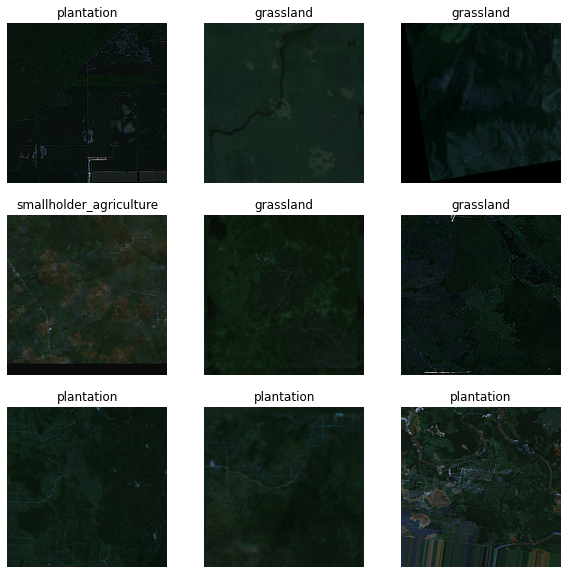

In [ ]:
plot_image_examples_grid(train_generator, reverse_mapping, label_mapping)

In [ ]:
# Define the backbone of the model using tensorflow.keras.applications
train_flag = False

# The backbone itself
base_model = tf.keras.applications.EfficientNetV2S(
    include_top=False, weights='imagenet', input_shape=(224,224, 3),
    include_preprocessing=False
)

# Make the inner layers trainable
base_model.trainable = True

# Definition of the optimizer and cost function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Tensorboard callback to visualize training in their platform
callbacks = [tf.keras.callbacks.TensorBoard(log_dir="/content/logs")]

82420632/82420632 [==============================] - 3s 0us/step


In [ ]:
# Let's instantiate our ModelGenerator class to compile and train the model
model = ModelGenerator(base_model, input_shape=(224,224, 3), n_classes=3)
model.compile_model(optimizer, loss_object)

In [ ]:
# Actual training. No verbosity since we are going to analize the model using tensorboard
model_history = model.train_model(train_generator, test_generator, epochs=100, verbose=0, callbacks=callbacks)

In [ ]:
# Test and generate a classification report
model.test_model(test_generator, 
                 batch_size=32, 
                 target_names=[
                     'plantation', 
                     'grassland', 
                     'smallholder_agriculture']
                )

                         precision    recall  f1-score   support

             plantation       0.79      0.74      0.76       234
              grassland       0.52      0.55      0.53        49
smallholder_agriculture       0.64      0.68      0.66       165

               accuracy                           0.70       448
              macro avg       0.65      0.66      0.65       448
           weighted avg       0.70      0.70      0.70       448



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:179: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


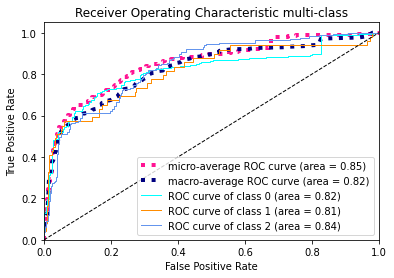

In [ ]:
# Generate a ROC curve
model.plot_roc_multiclass()

In [ ]:
# Let's load the whole training dataset and fit it into our generator

train_metadata_df = pd.read_csv('/content/gdrive/MyDrive/train_test_data/train_data.csv')
train_metadata_df.example_path = train_metadata_df.example_path.apply(lambda path: "/content/drive/MyDrive/My_Data/" + path)

train_generator = BalanceDatasetGenerator(
                                dataset=train_metadata,
                                mapping=mapping,
                                batch_size=32,
                                input_shape=(224, 224),
                                augmentation=aug_function,
                                balancing=True,
                                is_training=True)

In [ ]:
# Get a new backbone for this iteration
base_model = tf.keras.applications.EfficientNetV2S(
    include_top=False, weights='imagenet', input_shape=(224,224, 3),
    include_preprocessing=False
)

# Make the inner layers trainable
base_model.trainable = True

# Definition of the optimizer and cost function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Let's instantiate a fresh model and compile it
model = ModelGenerator(base_model, input_shape=(224,224, 3), n_classes=3)
model.compile_model(optimizer, loss_object)

# Train the model
model_history = model.train_model(train_generator, test_generator, epochs=75, verbose=1, callbacks=callbacks)

Epoch 1/75
36/36 [==============================] - 49s 746ms/step - loss: 2.7462 - categorical_accuracy: 0.3689 - auc_all: 0.5181 - precision_0: 0.4498 - recall_0: 0.4104 - precision_1: 0.4498 - recall_1: 0.4104 - precision_2: 0.4498 - recall_2: 0.4104 - val_loss: 9.7079 - val_categorical_accuracy: 0.5179 - val_auc_all: 0.4914 - val_precision_0: 0.5337 - val_recall_0: 0.9487 - val_precision_1: 0.5337 - val_recall_1: 0.9487 - val_precision_2: 0.5337 - val_recall_2: 0.9487
Epoch 2/75
36/36 [==============================] - 21s 585ms/step - loss: 1.1734 - categorical_accuracy: 0.3481 - auc_all: 0.5030 - precision_0: 0.3934 - recall_0: 0.3028 - precision_1: 0.3934 - recall_1: 0.3028 - precision_2: 0.3934 - recall_2: 0.3028 - val_loss: 1.1000 - val_categorical_accuracy: 0.5045 - val_auc_all: 0.5072 - val_precision_0: 0.0000e+00 - val_recall_0: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/75
36/36 [====

In [ ]:
model.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-s (Functiona  (None, 7, 7, 1280)       20331360  
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 20,335,203
Trainable params: 20,181,331
Non-trainable params: 153,872
_________________________________________________________________


In [ ]:
# save the weights of our model
model.model.save("/content/gdrive/MyDrive//My_Data/final_final_final_model.h5")

In [ ]:
# Let's load the whole training dataset and fit it into our generator
# train_metadata_df = pd.read_csv('/content/gdrive/MyDrive/train_test_data/train_data.csv')
test_path = "/content/gdrive/MyDrive/train_test_data/test.csv"
test_metadata_df = pd.read_csv(test_path)
test_metadata_df.example_path = test_metadata_df.example_path.apply(lambda path: "/content/gdrive/MyDrive/My_Data/" + path)

# Insert dummy values for the label to maintain format with the generator object
test_metadata_df["label"] = 0

# Rearage columns
test_metadata_df = test_metadata_df[["label", "latitude", "longitude", "year", "example_path"]]
test_metadata_df.head()

,label,latitude,longitude,year,example_path
0,0,0.761681,122.755954,2006,/content/gdrive/MyDrive/My_Data/train_test_dat...
1,0,-8.059785,113.053791,2007,/content/gdrive/MyDrive/My_Data/train_test_dat...
2,0,-2.006610,111.746316,2002,/content/gdrive/MyDrive/My_Data/train_test_dat...
3,0,0.901765,114.042495,2016,/content/gdrive/MyDrive/My_Data/train_test_dat...
4,0,1.911210,100.829633,2008,/content/gdrive/MyDrive/My_Data/train_test_dat...


In [ ]:
# Create test generator
test_metadata = test_metadata_df.values
test_generator = BalanceDatasetGenerator(
                                dataset=test_metadata,
                                mapping=mapping,
                                batch_size=32,
                                input_shape=(224, 224),
                                augmentation=aug_function,
                                shuffle=False,
                                balancing=False,
                                is_training=False)

In [ ]:
# Generating predictions using the test dataset
predictions = model.model.predict(test_generator)

20/20 [==============================] - 8s 263ms/step


In [ ]:
# Get the predictions into a python dictionary
preds_categorical = np.argmax(predictions, axis=1)
result = {"target": {}}
for i in range(len(predictions)):
  result["target"][str(i)] = int(preds_categorical[i])

In [ ]:
# Save predictions from dictionary into JSON file
from json import dumps
with open("/content/gdrive/MyDrive//My_Data/predictions.json", 'w') as outfile:
    dump(result, outfile, indent=4)
